# Assignment 3

In [76]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

df = pd.read_csv('201502-citibike-tripdata.csv')

Populating the interactive namespace from numpy and matplotlib


## Idea
### Bike durations of old people tend to be longer.
## Null Hypothesis
### The mean of bike durations of people under 60 is bigger than or equal to that of people over 60.
## Alternative Hypothesis
### The mean of bike durations of people under 60 is smaller than that of people over 60.
## Significance Level: $\alpha$=0.05

## Histograms of trip durations

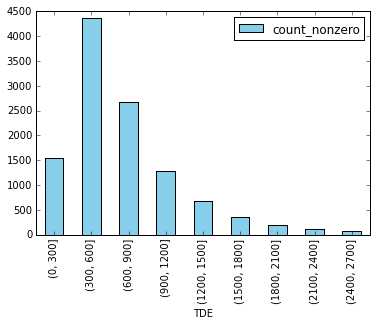

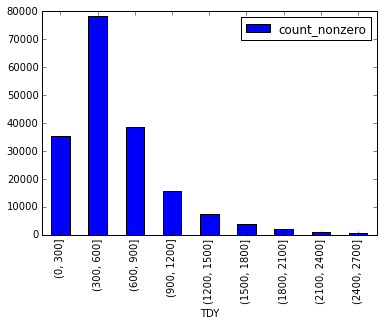

In [78]:
df['TDE'] = df['tripduration'][(df['usertype'] == 'Subscriber') & (df['birth year'] <= 1955) & (df['tripduration'] <= 2700)]
df['TDY'] = df['tripduration'][(df['usertype'] == 'Subscriber') & (df['birth year'] > 1955) & (df['tripduration'] <= 2700)]

bins = np.arange(0, 3000, 300)
df.TDE.groupby(pd.cut(df.TDE, bins)).agg([count_nonzero]).plot(kind='bar',color='skyblue',label='haha')
df.TDY.groupby(pd.cut(df.TDY, bins)).agg([count_nonzero]).plot(kind='bar')

## Hypothesis Testing

### In this problem we will apply Welch's t-test, which is used when the two population variances are not assumed to be equal and hence must be estimated separately. The t-statistic $$t = {\; \overline{X}_1 - \overline{X}_2 \; \over \sqrt{ \; {s_1^2 \over N_1} \; + \; {s_2^2 \over N_2} \quad }}$$

In [81]:
# calculate mean and variance

TDE_count = np.count_nonzero(np.isnan(df['TDE']))
TDY_count = np.count_nonzero(np.isnan(df['TDY']))
TDE_mean = mean(df['TDE'])
TDY_mean = mean(df['TDY'])
TDE_var = var(df['TDE'])
TDY_var = var(df['TDY'])

In [80]:
# calculate t-statistic
t = ( TDE_mean - TDY_mean ) / np.sqrt( TDE_var / TDE_count + TDY_var / TDY_count )
print t

29.2838826472


### Since $t>1.65$ (this is an one-side test), we can reject the null hypothesis.